# Global Terrorism analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
data = pd.read_csv("F:\\04- PYTHON PROJECTS\\01- Data Science Projects\\Global Terrorism Analysis\\globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', low_memory=False)

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
len(data.columns)

135

In [7]:
data=data[['Year','Month',
           'Day','Country',
           'Region','city',
           'latitude','longitude',
           'AttackType','Killed',
           'Wounded','Target',
           'Summary','Group',
           'Target_type',
           'Weapon_type','Motive']]

In [8]:
len(data.columns)

17

In [9]:
# creating casualities column
data['casualities'] = data['Killed'] + data['Wounded']

In [10]:
data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [11]:
data_tmp = data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
Month,181691.0,6.467277,3.388303,0.000000e+00,4.000000,6.000000,9.000000,12.000000
Day,181691.0,15.505644,8.814045,0.000000e+00,8.000000,15.000000,23.000000,31.000000
latitude,177135.0,23.498343,18.569242,-5.315461e+01,11.510046,31.467463,34.685087,74.633553
longitude,177134.0,-458.695653,204778.988611,-8.618590e+07,4.545640,43.246506,68.710327,179.366667
Killed,171378.0,2.403272,11.545741,0.000000e+00,0.000000,0.000000,2.000000,1570.000000
Wounded,165380.0,3.167668,35.949392,0.000000e+00,0.000000,0.000000,2.000000,8191.000000
casualities,164817.0,5.296128,42.069023,0.000000e+00,0.000000,1.000000,4.000000,9574.000000


In [13]:
# Remove all duplicate rows using ".drop_duplicates"
data = data.drop_duplicates(keep=False)

# length of data after removing duplicaterows
len(data)

169019

In [14]:
# checking null values
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         3885
longitude        3886
AttackType          0
Killed           9099
Wounded         14879
Target            521
Summary         56798
Group               0
Target_type         0
Weapon_type         0
Motive         119356
casualities     15415
dtype: int64

<AxesSubplot:>

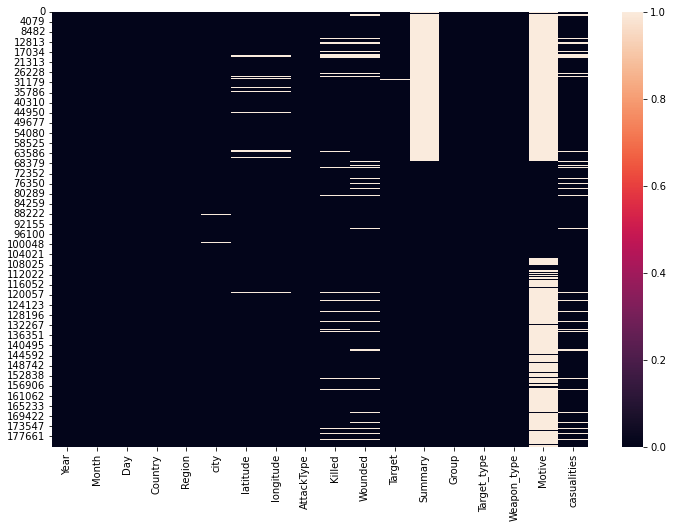

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())

In [16]:
# Checking correlation
data.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
Year,1.000000,-0.002714,0.017774,0.146533,0.004175,0.008056,0.012206,0.009336
Month,-0.002714,1.000000,0.005875,-0.013749,-0.004012,0.003195,0.002938,0.003378
Day,0.017774,0.005875,1.000000,0.002366,-0.002362,-0.004478,-0.001476,-0.001615
latitude,0.146533,-0.013749,0.002366,1.000000,0.001584,-0.022251,0.015244,0.008455
longitude,0.004175,-0.004012,-0.002362,0.001584,1.000000,-0.000537,0.000236,0.000038
Killed,0.008056,0.003195,-0.004478,-0.022251,-0.000537,1.000000,0.535030,0.690600
Wounded,0.012206,0.002938,-0.001476,0.015244,0.000236,0.535030,1.000000,0.980506
casualities,0.009336,0.003378,-0.001615,0.008455,0.000038,0.690600,0.980506,1.000000


<AxesSubplot:>

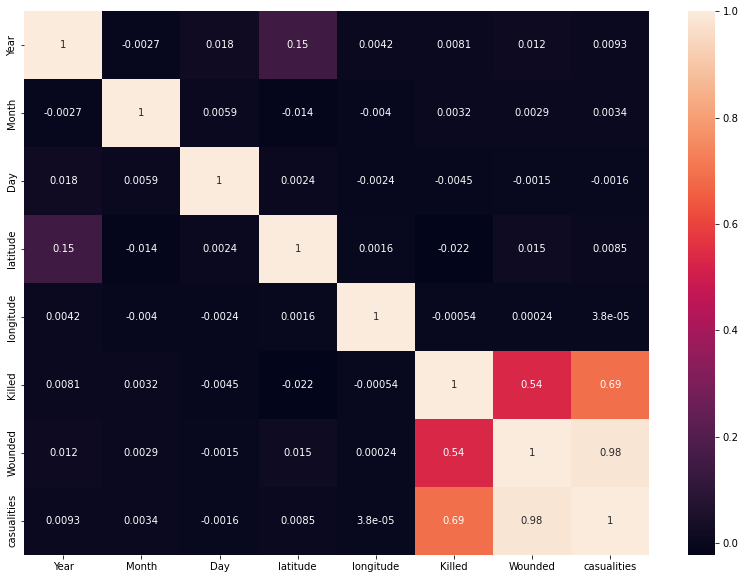

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True)

In [18]:
data.corr()['Year'].sort_values(ascending=False)

Year           1.000000
latitude       0.146533
Day            0.017774
Wounded        0.012206
casualities    0.009336
Killed         0.008056
longitude      0.004175
Month         -0.002714
Name: Year, dtype: float64

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

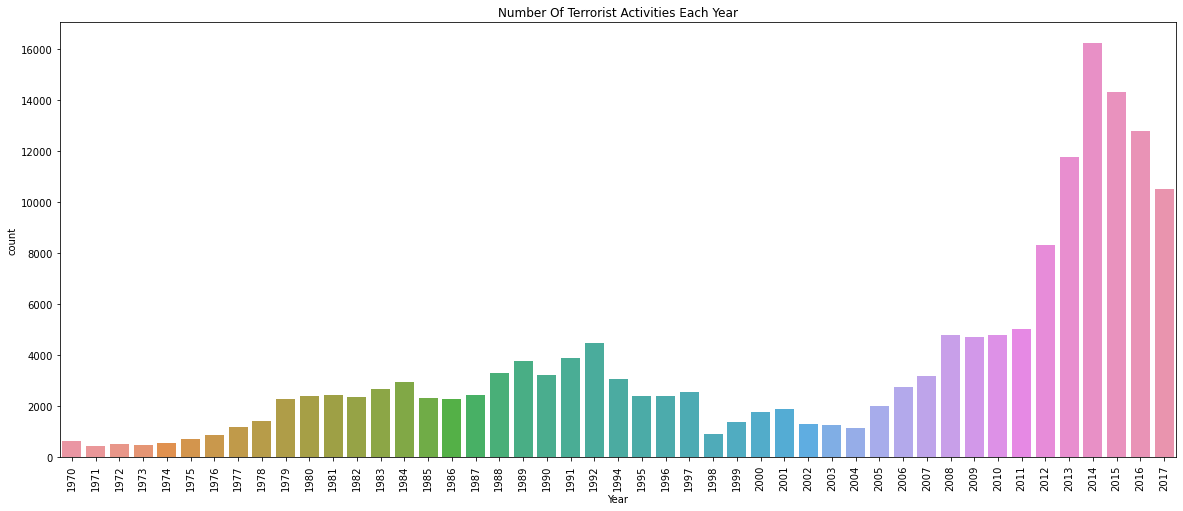

In [19]:
# data v/s Year
plt.figure(figsize=(20,8))
sns.countplot(data=data, x=data.Year)
plt.xticks(rotation = 90)
plt.title("Number Of Terrorist Activities Each Year")

### Terrorist Activities by Regions

In [20]:
data.Region.value_counts()

Middle East & North Africa     48143
South Asia                     43072
Sub-Saharan Africa             16925
South America                  15783
Western Europe                 14723
Southeast Asia                 11957
Central America & Caribbean     8639
Eastern Europe                  4940
North America                   3325
East Asia                        693
Central Asia                     548
Australasia & Oceania            271
Name: Region, dtype: int64

#### .crosstab()
- Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

##### Syntax:
    pd.crosstab(
        index,
        columns,
        values=None,
        rownames=None,
        colnames=None,
        aggfunc=None,
        margins: 'bool' = False,
        margins_name: 'str' = 'All',
        dropna: 'bool' = True,
        normalize=False,
    )

In [21]:
# Number of attacks in each region per year
pd.crosstab(index=data.Year, columns=data.Region).head(10)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,26,462,65,1,10,3,50
1971,1,5,0,1,3,55,233,24,0,6,2,125
1972,3,3,0,0,1,45,71,18,1,11,1,361
1973,1,6,0,2,1,19,60,83,1,2,4,288
1974,1,11,0,4,2,38,111,81,2,3,7,314
1975,0,9,0,7,0,44,153,55,4,7,12,424
1976,0,45,0,2,0,55,123,91,4,12,11,539
1977,0,24,0,4,2,186,135,109,2,8,29,677
1978,2,199,0,35,2,124,114,214,2,37,46,661


<AxesSubplot:xlabel='Year'>

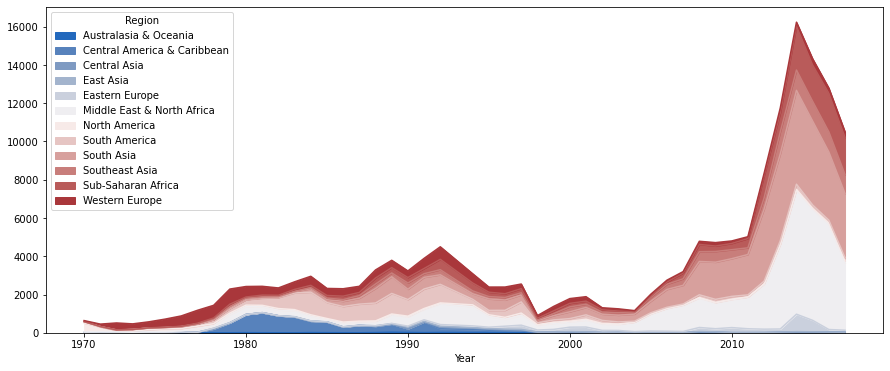

In [22]:
# Plotting Number of attacks in each region per year
pd.crosstab(index=data.Year, columns=data.Region).plot(kind='area', figsize=(15,6), colormap='vlag')

We can notice from the previous figure that (Middle East & North Africa) and (south Asia) have huge increase in last 10 years.

### Number of Total Attacks in Each Country

In [23]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')

#### Country

In [24]:
top_contries = data.Country.value_counts()[:10].to_frame().reset_index()

top_contries.columns = ['Country', 'Count']
top_contries

,Country,Count
0,Iraq,23200
1,Pakistan,13623
2,Afghanistan,12416
3,India,11456
4,Colombia,7251
5,Philippines,6726
6,United Kingdom,4921
7,Peru,4718
8,Somalia,4105
9,El Salvador,4004


Text(0, 0.5, 'Count')

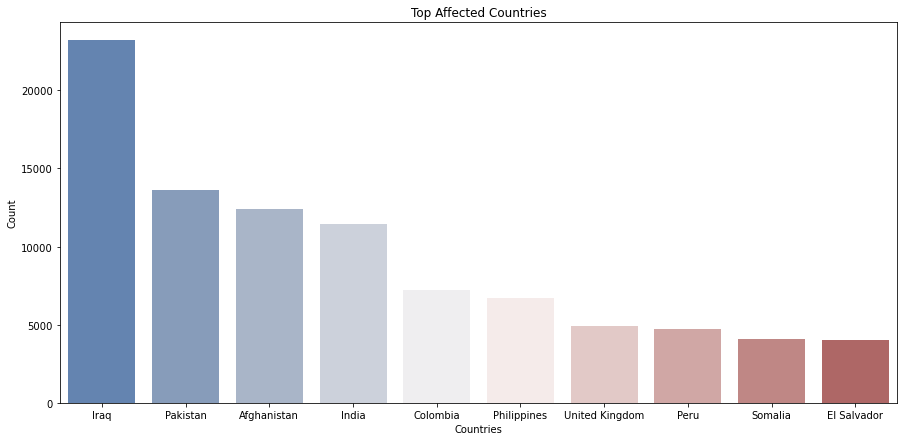

In [25]:
# plotting top_contries
plt.subplots(figsize=(15,7))
sns.barplot(data=top_contries, x=top_contries.Country, y=top_contries.Count, palette='vlag')
plt.title("Top Affected Countries")
plt.xlabel("Countries")
plt.ylabel("Count")


We can notice that the first three affected countries by terrorism are from Middle East

#### Weapons

In [26]:
top_weapons = data.Weapon_type.value_counts()[:5].to_frame().reset_index()
top_weapons.columns = ['Weapon_Type', 'Count']

top_weapons

,Weapon_Type,Count
0,Explosives,84373
1,Firearms,56926
2,Unknown,14281
3,Incendiary,9148
4,Melee,3509


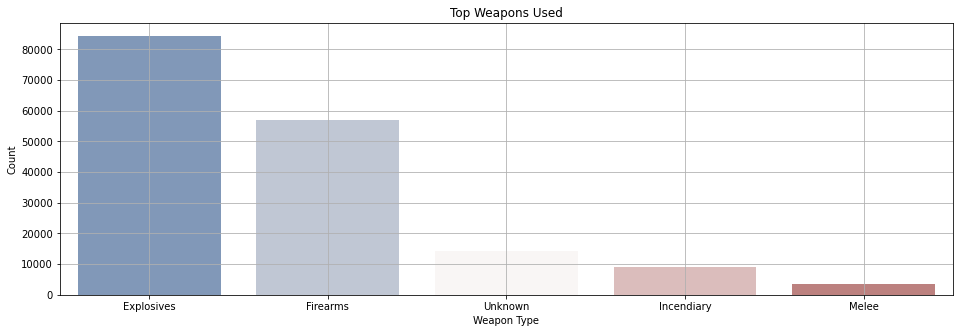

In [27]:
# Plotting top_weapons in barplot
plt.subplots(figsize=(16,5))
sns.barplot(data=top_weapons, 
              x=top_weapons.Weapon_Type,
              y=top_weapons.Count,
              palette='vlag')

plt.title("Top Weapons Used")
plt.xlabel("Weapon Type")
plt.ylabel("Count")
plt.grid()

<AxesSubplot:ylabel='Weapon_type'>

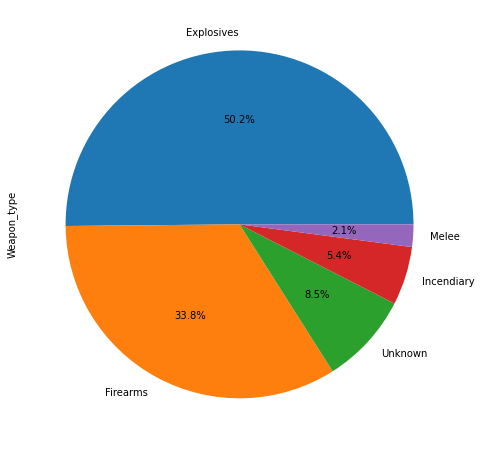

In [28]:
# PLotting top 5 weapons used in a pie plot
plt.figure(figsize=(12,8))
top5_weapons = data.Weapon_type.value_counts()[:5]
top5_weapons.plot(kind = 'pie', autopct="%1.1f%%")

We can notice that the Explosive is the dominant type

### Number of Total Casualities in Each Country

In [29]:
data.casualities.head(10)

0    1.0
1    0.0
2    1.0
3    NaN
4    NaN
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: casualities, dtype: float64

In [30]:
casualities_count = data.groupby("Country").casualities.sum().to_frame().reset_index().sort_values(by= 'casualities', ascending=False)[:10]

casualities_count

,Country,casualities
84,Iraq,201915.0
0,Afghanistan,79661.0
134,Pakistan,63714.0
80,India,45997.0
167,Sri Lanka,29137.0
189,United States,24464.0
35,Colombia,22947.0
140,Philippines,22016.0
130,Nigeria,21444.0
175,Syria,21334.0


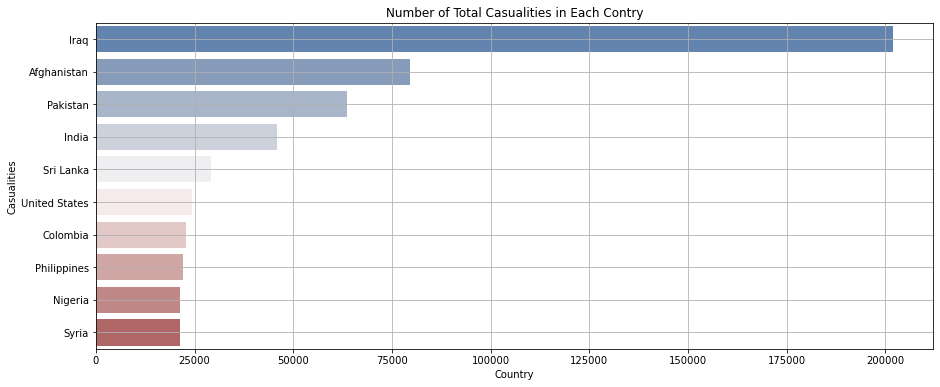

In [31]:
# plotting casualities count in each country
plt.subplots(figsize=(15,6))
sns.barplot(data=casualities_count, 
            x=casualities_count.casualities,
            y=casualities_count.Country,
            palette='vlag')

plt.title("Number of Total Casualities in Each Contry")
plt.xlabel("Country")
plt.ylabel("Casualities")
plt.grid()

We can notice from the previous figure that Iraq has the higest number of killed and wounded people

### Number of Total Attacks in Each Region

In [32]:
# data.head()


In [33]:
data.Region.value_counts()

Middle East & North Africa     48143
South Asia                     43072
Sub-Saharan Africa             16925
South America                  15783
Western Europe                 14723
Southeast Asia                 11957
Central America & Caribbean     8639
Eastern Europe                  4940
North America                   3325
East Asia                        693
Central Asia                     548
Australasia & Oceania            271
Name: Region, dtype: int64

In [34]:
region_attack = data.Region.value_counts().to_frame().reset_index()
region_attack.columns = ['Country', 'Total_Attacks']
region_attack

,Country,Total_Attacks
0,Middle East & North Africa,48143
1,South Asia,43072
2,Sub-Saharan Africa,16925
3,South America,15783
4,Western Europe,14723
5,Southeast Asia,11957
6,Central America & Caribbean,8639
7,Eastern Europe,4940
8,North America,3325
9,East Asia,693


Text(0.5, 1.0, 'Number of Total Attacks in Each Region')

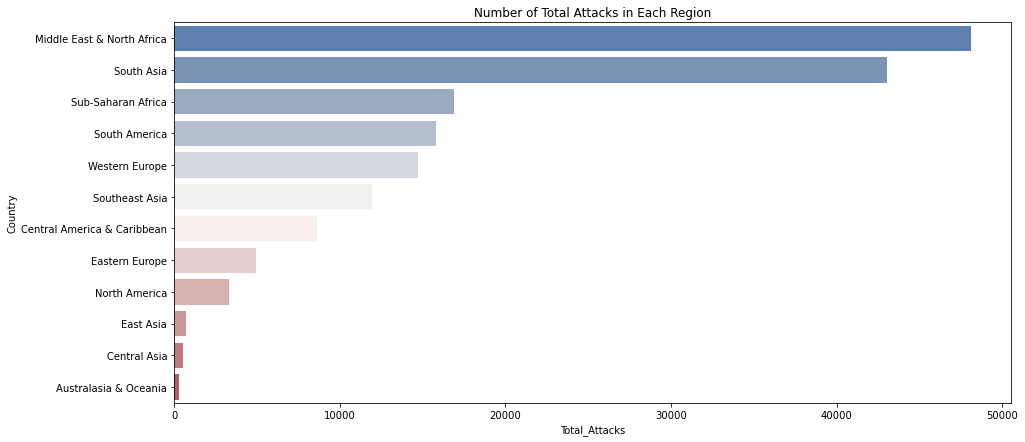

In [35]:
plt.subplots(figsize=(15,7))
sns.barplot(data=region_attack, x=region_attack.Total_Attacks, y=region_attack.Country, palette='vlag')
plt.title('Number of Total Attacks in Each Region')

<AxesSubplot:ylabel='Region'>

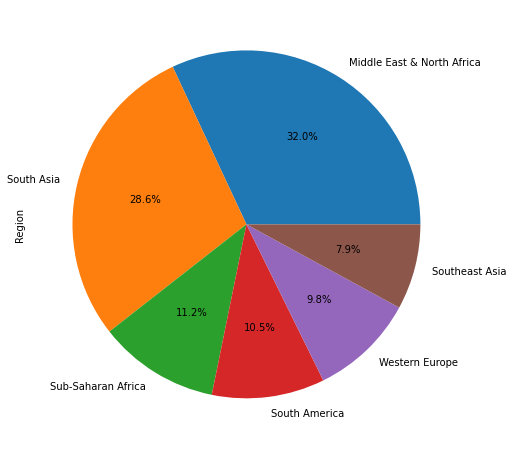

In [36]:
top5_region = data.Region.value_counts()[:6]
top5_region.plot(kind='pie', autopct = "%1.1f%%", figsize= (12,8))

We can notice from the previous figure that (Middle East & North Africa) and (south Asia) are the most Regions effected by the terrorism attacks

### Middle East & North Africa

In [37]:
mid_nor = data[data.Region == "Middle East & North Africa"]

mid_nor.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
95,1970,2,28,Jordan,Middle East & North Africa,Hebron,31.530243,35.094162,Armed Assault,NaN,NaN,Tourist Bus,NaN,Unknown,Tourists,Firearms,NaN,NaN
133,1970,3,14,Egypt,Middle East & North Africa,Alexandria,31.198056,29.919167,Bombing/Explosion,0.0,2.0,United Arab Airlines Flight Antonov 24 Acft,NaN,Unknown,Airports & Aircraft,Explosives,NaN,2.0
158,1970,3,29,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
195,1970,4,15,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Bombing/Explosion,0.0,0.0,US Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
226,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.0,0.0,EL AL Office,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,0.0


In [38]:
mid_nor.count()

Year           48143
Month          48143
Day            48143
Country        48143
Region         48143
city           48113
latitude       47278
longitude      47278
AttackType     48143
Killed         45989
Wounded        44738
Target         48012
Summary        39823
Group          48143
Target_type    48143
Weapon_type    48143
Motive         15213
casualities    44577
dtype: int64

In [39]:
data = mid_nor.Country.value_counts().reset_index()
data.columns = ['Country', 'Count']

data

,Country,Count
0,Iraq,23200
1,Turkey,3993
2,Yemen,3278
3,Algeria,2703
4,Lebanon,2407
5,Egypt,2362
6,Libya,2189
7,West Bank and Gaza Strip,2184
8,Israel,2116
9,Syria,2116


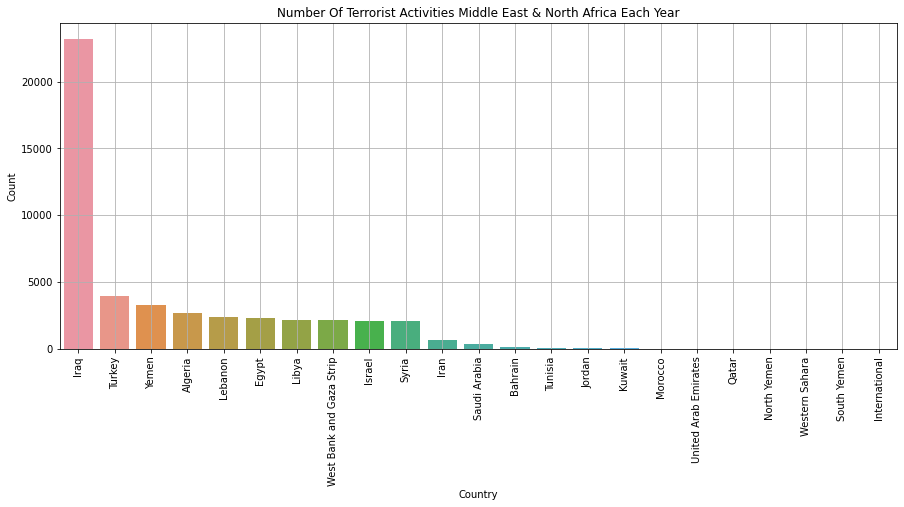

In [40]:
plt.subplots(figsize=(15,6))
sns.barplot(data=data, x=data.Country, y=data.Count)
plt.xticks(rotation = 90)
plt.title("Number Of Terrorist Activities Middle East & North Africa Each Year")
plt.grid()

In [41]:
data.count()

Country    23
Count      23
dtype: int64

In [42]:
mid_nor.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')

In [43]:
# Terrorist Attack Each Month
mid_nor.Month.value_counts().sort_values()

0        2
12    3525
9     3646
2     3754
1     3888
11    3950
4     4060
6     4089
5     4163
10    4166
3     4169
8     4348
7     4383
Name: Month, dtype: int64

Text(0.5, 1.0, 'Number of Terrorist Acctivities in Middle East & North Africa Each Month')

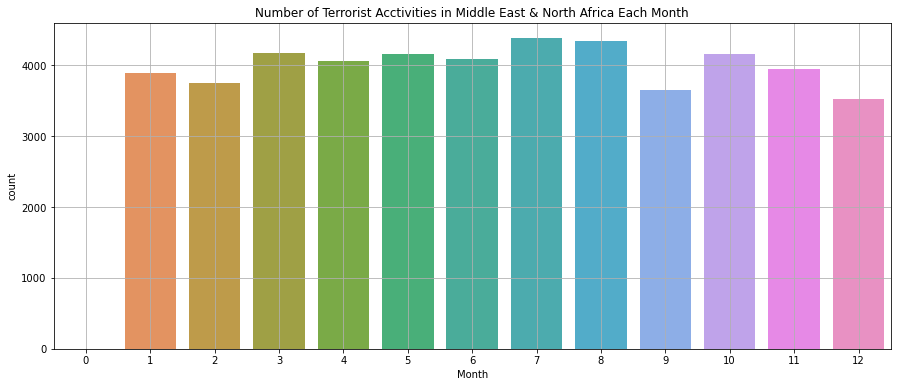

In [44]:
plt.subplots(figsize=(15,6))
sns.countplot(data=mid_nor, x=mid_nor.Month)
plt.grid()
plt.title("Number of Terrorist Acctivities in Middle East & North Africa Each Month")

In [45]:
# Terrorist Attack Each Day
mid_nor.Day.value_counts()

27    1676
19    1662
3     1661
15    1631
16    1626
12    1624
9     1620
2     1608
13    1606
24    1604
7     1602
23    1596
5     1587
17    1585
25    1575
8     1574
6     1572
4     1565
11    1564
14    1557
20    1556
28    1546
10    1542
26    1518
18    1513
1     1510
22    1489
21    1471
29    1447
30    1419
31     896
0      141
Name: Day, dtype: int64

Text(0.5, 1.0, 'Number Of Terrorist Activities Middle East & North Africa Each Day')

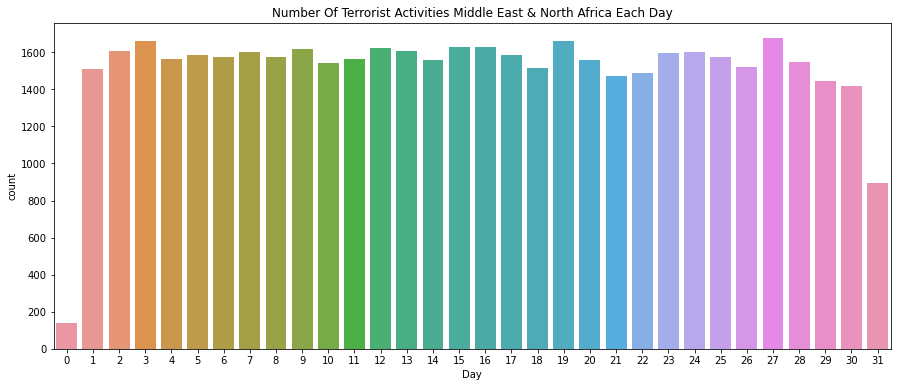

In [46]:
plt.subplots(figsize=(15,6))
sns.countplot(data=mid_nor, x=mid_nor.Day)
plt.title('Number Of Terrorist Activities Middle East & North Africa Each Day')


In [47]:
top5_country = mid_nor.Country.value_counts()[:6]

top5_country

Iraq       23200
Turkey      3993
Yemen       3278
Algeria     2703
Lebanon     2407
Egypt       2362
Name: Country, dtype: int64

<AxesSubplot:ylabel='Country'>

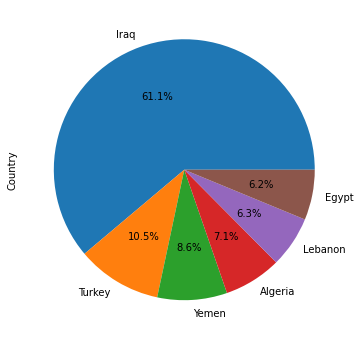

In [48]:
top5_country.plot(kind='pie', autopct="%1.1f%%",figsize=(6,6))

In [49]:
# Number Of Terrorist Activities In Top 20 city
top20_city = mid_nor.city.value_counts()[:20].reset_index()
top20_city.columns = ['City', 'Count']
top20_city

,City,Count
0,Baghdad,7553
1,Unknown,2495
2,Mosul,2104
3,Kirkuk,913
4,Beirut,900
5,Istanbul,859
6,Benghazi,837
7,Baqubah,723
8,Jerusalem,617
9,Fallujah,550


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Baghdad'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Mosul'),
  Text(3, 0, 'Kirkuk'),
  Text(4, 0, 'Beirut'),
  Text(5, 0, 'Istanbul'),
  Text(6, 0, 'Benghazi'),
  Text(7, 0, 'Baqubah'),
  Text(8, 0, 'Jerusalem'),
  Text(9, 0, 'Fallujah'),
  Text(10, 0, 'Tripoli'),
  Text(11, 0, 'Arish'),
  Text(12, 0, 'Ramadi'),
  Text(13, 0, 'Sanaa'),
  Text(14, 0, 'Aleppo'),
  Text(15, 0, 'Algiers'),
  Text(16, 0, 'Tikrit'),
  Text(17, 0, 'Damascus'),
  Text(18, 0, 'Gaza'),
  Text(19, 0, 'Abu Ghraib')])

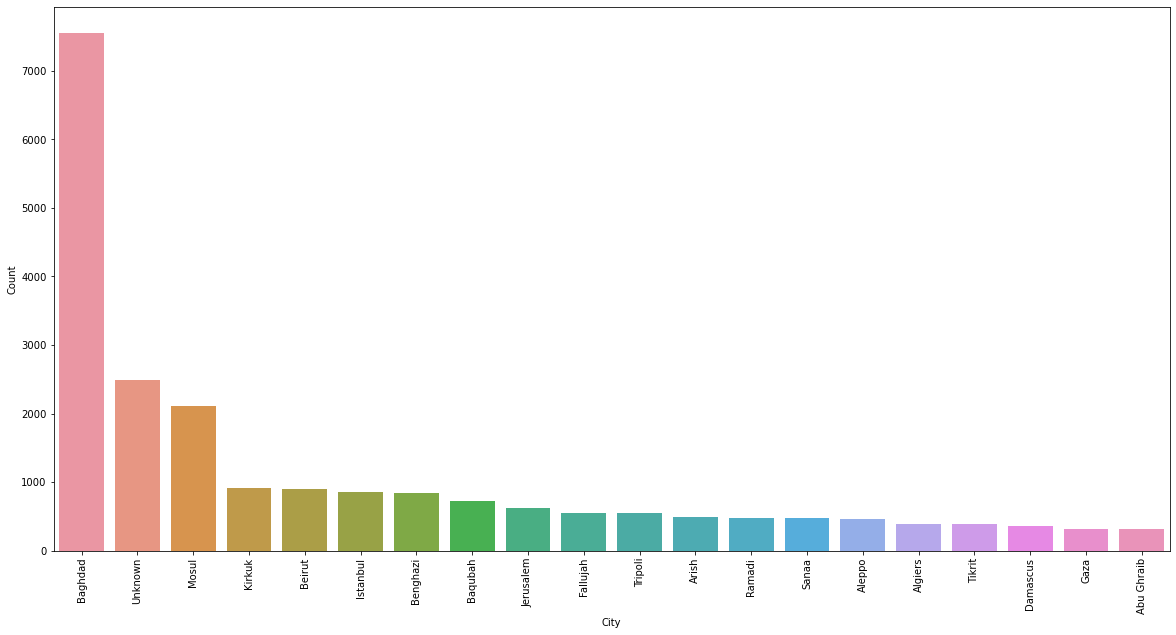

In [50]:
plt.subplots(figsize=(20,10))
sns.barplot(data=top20_city, x=top20_city.City, y=top20_city.Count)
plt.xticks(rotation=90)

In [51]:
# Number Of Terrorist Activities In Top 5 city
top5_city = mid_nor.city.value_counts()[:5]

<AxesSubplot:ylabel='city'>

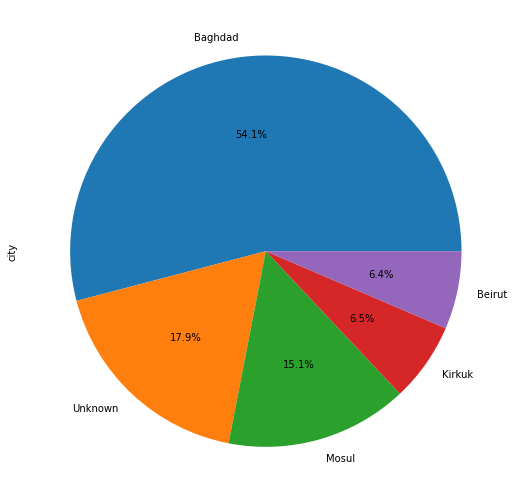

In [52]:
top5_city.plot(kind='pie', autopct="%1.1f%%",figsize=(9,9))

In [53]:
# Terrorist Groups
top20_ter_group = mid_nor.Group.value_counts()[:20].reset_index()
top20_ter_group.columns = ["TerroristGroups", "Count"]
top20_ter_group.head()

,TerroristGroups,Count
0,Unknown,28178
1,Islamic State of Iraq and the Levant (ISIL),5033
2,Kurdistan Workers' Party (PKK),2073
3,Palestinians,1087
4,Houthi extremists (Ansar Allah),1035


Text(0.5, 1.0, 'Top 20 Terrorist Groups')

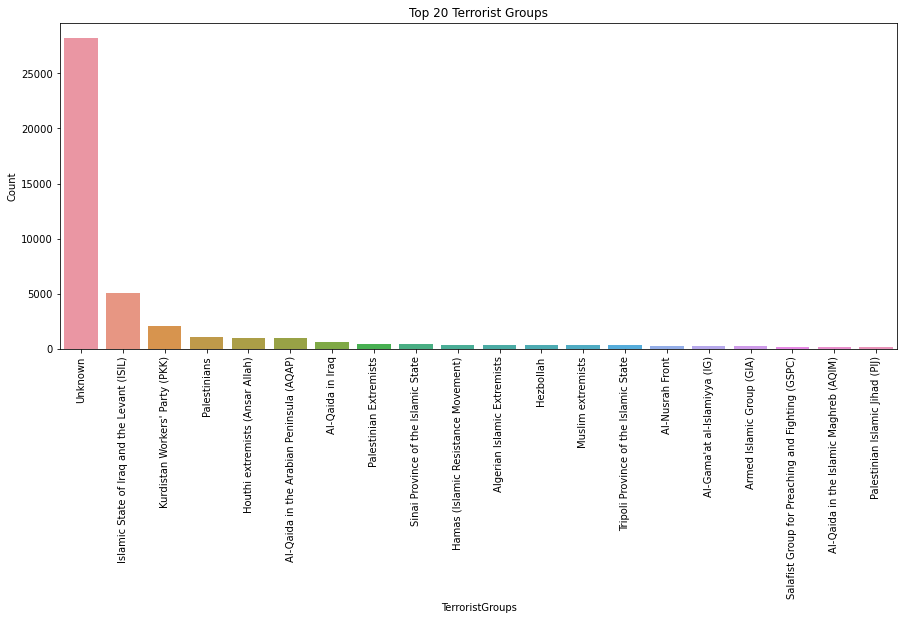

In [54]:
plt.subplots(figsize=(15,6))
sns.barplot(data=top20_ter_group, x=top20_ter_group.TerroristGroups, y=top20_ter_group.Count)
plt.xticks(rotation=90)
plt.title("Top 20 Terrorist Groups")

In [55]:
# Top Attack Types
top5_att = mid_nor.AttackType.value_counts()[:5]
top5_att

Bombing/Explosion              29116
Armed Assault                   9115
Assassination                   4174
Hostage Taking (Kidnapping)     2578
Unknown                         1822
Name: AttackType, dtype: int64

Text(0.5, 1.0, 'Top Attack Types')

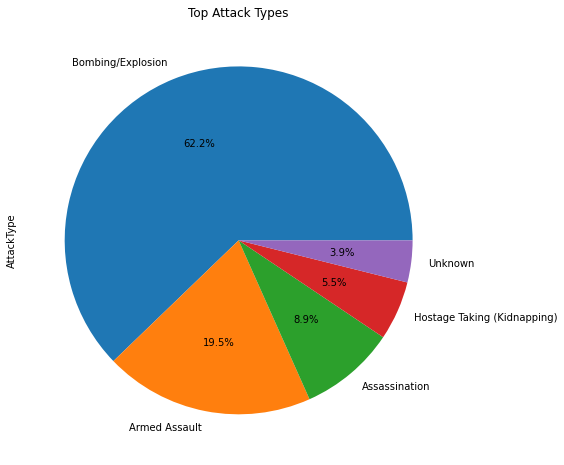

In [56]:
plt.figure(figsize=(12,8))
top5_att.dropna()
top5_att.plot(kind='pie',autopct="%1.1f%%")
plt.title('Top Attack Types')

In [57]:
mid_nor.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')

In [58]:
# Top Weapon Types
top5_weapon = mid_nor.Weapon_type.value_counts()[:5]
top5_weapon

Explosives    30458
Firearms      11723
Unknown        3571
Melee          1212
Incendiary      997
Name: Weapon_type, dtype: int64

Text(0.5, 1.0, 'Top Weapon Types')

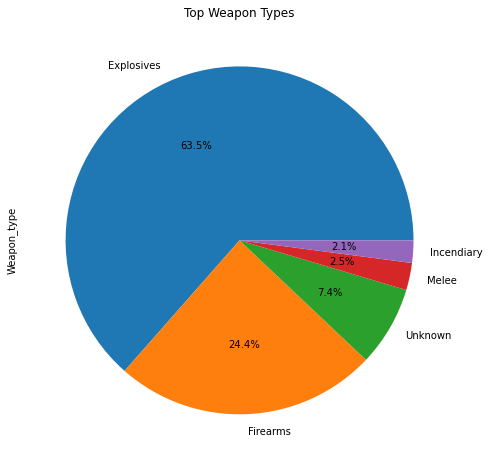

In [59]:
plt.figure(figsize=(12,8))
top5_weapon.dropna()
top5_weapon.plot(kind='pie',autopct="%1.1f%%")
plt.title('Top Weapon Types')

In [60]:
# Target Type
target_type = mid_nor.Target_type.value_counts()[:15].reset_index()
target_type.columns = ['TargetType', 'Count']

Text(0.5, 1.0, 'Target Types')

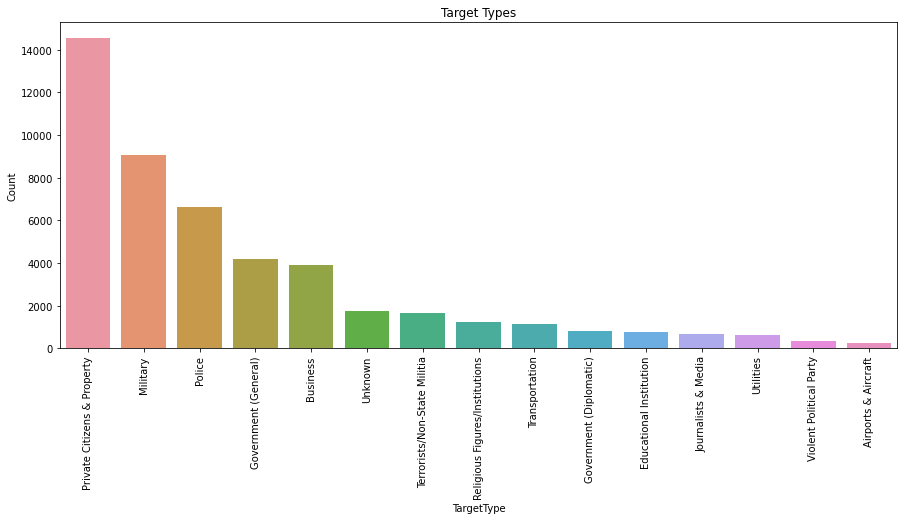

In [61]:
plt.subplots(figsize=(15,6))
sns.barplot(data=target_type, x=target_type.TargetType, y=target_type.Count)
plt.xticks(rotation=90)
plt.title('Target Types')

In [62]:
# Casualities per country in Middle East Asia and North Africa
casu_count = mid_nor.groupby(by='Country').casualities.sum().to_frame().reset_index().sort_values(by='casualities', ascending=False)[:15]
# casu_count.columns= ['Casualities']
casu_count.head()

,Country,casualities
5,Iraq,201915.0
16,Syria,21334.0
0,Algeria,18961.0
18,Turkey,16653.0
22,Yemen,15857.0


Text(0.5, 1.0, 'Number of Total Casualities in Each Country in Middle East Asia and North Africa')

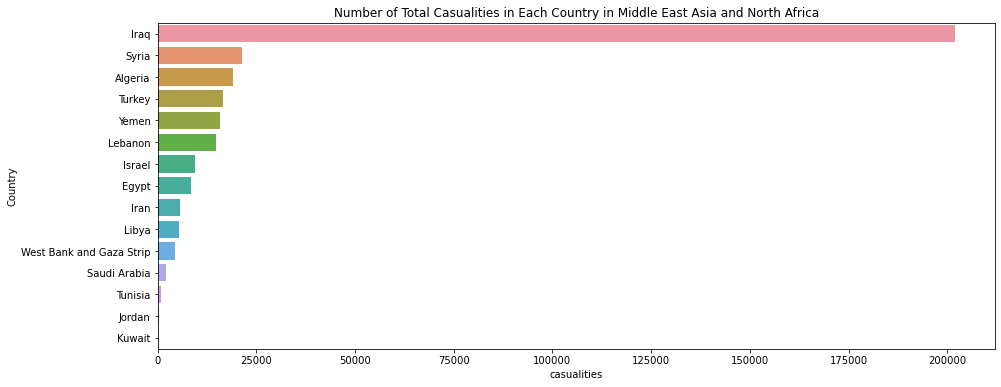

In [63]:
plt.subplots(figsize=(15,6))
sns.barplot(data=casu_count, x=casu_count.casualities, y=casu_count.Country)
plt.title('Number of Total Casualities in Each Country in Middle East Asia and North Africa')

In [64]:
# Affected Peoples in Middle East Asia and North Africa
affected_peoples = mid_nor[['Country','Killed','Wounded','casualities']]
affected_peoples = affected_peoples.groupby("Country").sum().reset_index().sort_values(by='casualities', ascending=False)
affected_peoples

,Country,Killed,Wounded,casualities
5,Iraq,78138.0,133976.0,201915.0
16,Syria,14885.0,13925.0,21334.0
0,Algeria,10887.0,8994.0,18961.0
18,Turkey,6870.0,9876.0,16653.0
22,Yemen,8609.0,9038.0,15857.0
9,Lebanon,4029.0,10876.0,14705.0
6,Israel,1703.0,7914.0,9394.0
2,Egypt,3800.0,4761.0,8525.0
4,Iran,1673.0,4029.0,5623.0
10,Libya,2592.0,3310.0,5501.0


<AxesSubplot:xlabel='Killed', ylabel='Country'>

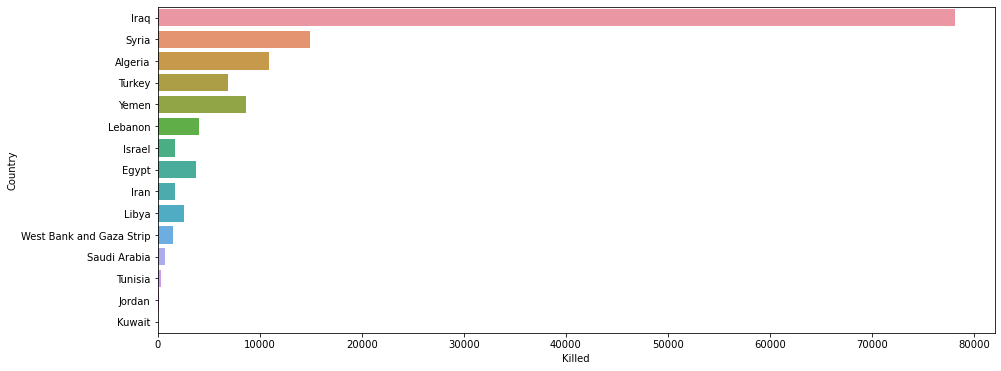

In [65]:
# BArplot for number of Killed persons in each country
plt.subplots(figsize=(15,6))
sns.barplot(data=affected_peoples, x=affected_peoples.Killed, y=affected_peoples.Country[:15])

<AxesSubplot:xlabel='Wounded', ylabel='Country'>

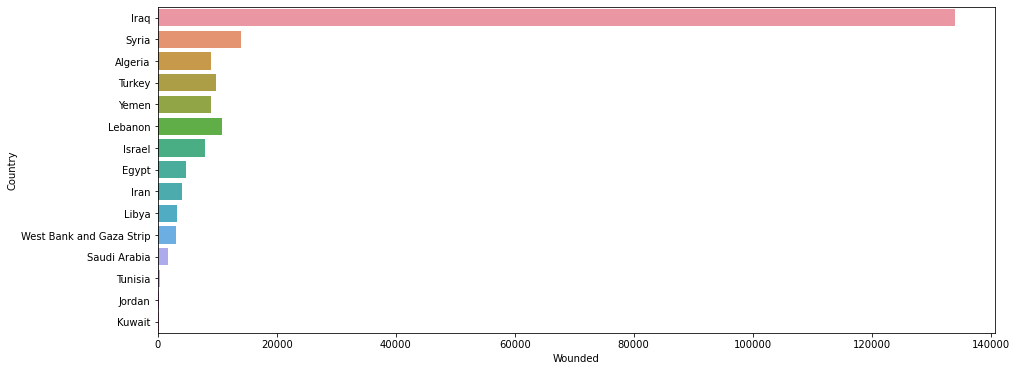

In [66]:
# BArplot for number of Wounded persons in each country
plt.subplots(figsize=(15,6))
sns.barplot(data=affected_peoples, x=affected_peoples.Wounded, y=affected_peoples.Country[:15])

In [67]:
count_terror = mid_nor.Country.value_counts()[:10].to_frame()
count_terror.columns = ['Killed']
count_terror

,Killed
Iraq,23200
Turkey,3993
Yemen,3278
Algeria,2703
Lebanon,2407
Egypt,2362
Libya,2189
West Bank and Gaza Strip,2184
Israel,2116
Syria,2116


Text(0.5, 1.0, 'Killed v/s Wounded in Each Country')

<Figure size 1224x432 with 0 Axes>

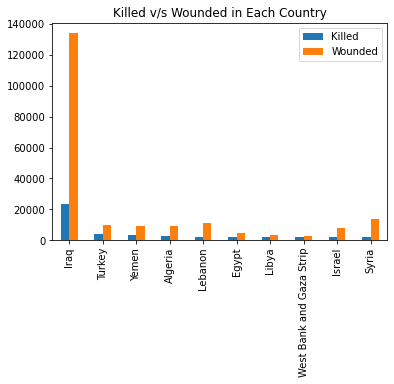

In [68]:

plt.figure(figsize=(17,6))
count_kill = mid_nor.groupby('Country')['Wounded'].sum().to_frame()
count_terror.merge(count_kill, left_index=True, right_index=True, how='left').plot(kind='bar')
plt.title("Killed v/s Wounded in Each Country")
# count_kill

In [69]:
# Terrorist Group That killed most number of peoples
grp_killed = mid_nor.groupby("Group")['Killed'].sum().sort_values(ascending=False)[:15].to_frame().reset_index()

Text(0, 0.5, 'Top 15 Terrorist Group')

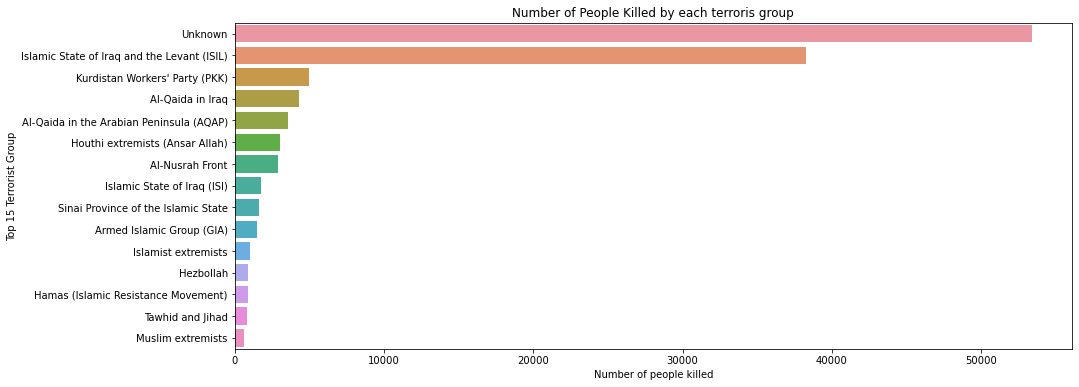

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(data=grp_killed, x=grp_killed.Killed, y=grp_killed.Group)
plt.title("Number of People Killed by each terroris group")
plt.xlabel("Number of people killed")
plt.ylabel("Top 15 Terrorist Group")

In [71]:
# Number of peoples died each year
died_year = mid_nor.groupby('Year')['Killed'].sum().sort_values().to_frame().reset_index()

died_year

,Year,Killed
0,1970,1.0
1,1971,7.0
2,1973,7.0
3,1972,33.0
4,1977,43.0
5,1976,45.0
6,1975,60.0
7,1974,81.0
8,1984,149.0
9,1988,365.0


Text(0, 0.5, 'Killed')

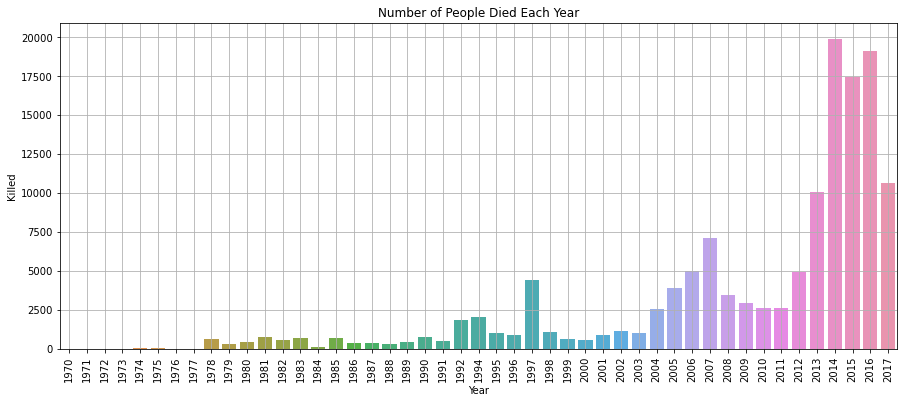

In [72]:
plt.figure(figsize=(15,6))
sns.barplot(data=died_year, x=died_year.Year, y=died_year.Killed)
plt.grid()
plt.xticks(rotation=90)
plt.title("Number of People Died Each Year")
plt.xlabel("Year")
plt.ylabel("Killed")

In [73]:
# Motive

In [74]:
# Top Attack Motives
att_motive = mid_nor.Motive.value_counts().to_frame().reset_index()[:10]
att_motive

,index,Motive
0,Unknown,5016
1,The specific motive for the attack is unknown.,4528
2,Part of a campaign by Islamic extremists to de...,66
3,Part of a campaign by Islamic extremists to de...,48
4,"The specific motive is unknown; however, sourc...",42
5,The specific motive for the attack is unknown,40
6,"The specific motive is unknown; however, Al-Qa...",39
7,"The specific motive is unknown; however, sourc...",36
8,"Abu Mohammed al-Adnani, a spokesperson for Al-...",32
9,The specific motive for the attack is unknown ...,32


In [75]:
# Summary
mid_nor.Summary.value_counts().head()

10/09/2012: Assailants threw incendiary devices and rocks at a school in Idil city, Sirnak province, Turkey. This was one of eight coordinated attacks carried out simultaneously in the area on this date. Two individuals were injured across all eight events. No group claimed responsibility for the incident; however, authorities suspected the Kurdistan Workers' Party (PKK).                                                                                                                    7
04/02/2015: Assailants opened fire on an Egyptian Armed Forces checkpoint with projectiles and guns south of Sheikh Zuweid, North Sinai governorate, Egypt. This was one of five coordinated attacks targeting checkpoints near Sheikh Zuweid on the same day. At least 33 people, including 16 soldiers and 15 assailants, were killed and 38 others, including 19 soldiers, were injured across all five assaults. The Sinai Province of the Islamic State claimed responsibility for the incidents.    4
06/13/2007: A to